In [1]:
#importing necessary libraries
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Defining necessary function for the association rules
def rules(df,confidence,support):
    ap = {}
    for i in confidence:
        frequent_itemsets =apriori(df,min_support=support,use_colnames=True)
        rule = association_rules(frequent_itemsets,min_threshold=i)
        ap[i] = len(rule.antecedents) #will show the number of rules
    return pd.Series(ap).to_frame("Support: %s"%support)

# Data - books

In [3]:
#importing the dataset
df1 = pd.read_csv("D:/Study/Excelr DS/Assignments/AS-9-Association/book.csv")
df1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
#basic information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


The data contains 2000 transactions containing 11 different categories of books. There are no null values in the dataset

In [5]:
#defining different values of support and confidence
support1 = [0.001,0.005,0.01,0.05,0.1]
confidence1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [6]:
# finding the number of rules for the different values of support and confidence
confs1 = []
for i in support1:
    ap_i1 = rules(df1,confidence=confidence1,support=i)
    confs1.append(ap_i1)

In [7]:
all_conf1 = pd.concat(confs1,axis=1)
all_conf1

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,110800,26603,9079,662,100
0.2,75765,20533,7156,599,100
0.3,54271,15735,5532,478,89
0.4,41693,11771,4285,371,70
0.5,32173,8981,3272,260,49
0.6,21440,5582,2179,135,30
0.7,12983,3818,1459,87,19
0.8,9918,2750,1004,62,6
0.9,7409,1657,563,10,1


Text(0.5, 0, 'Confidence')

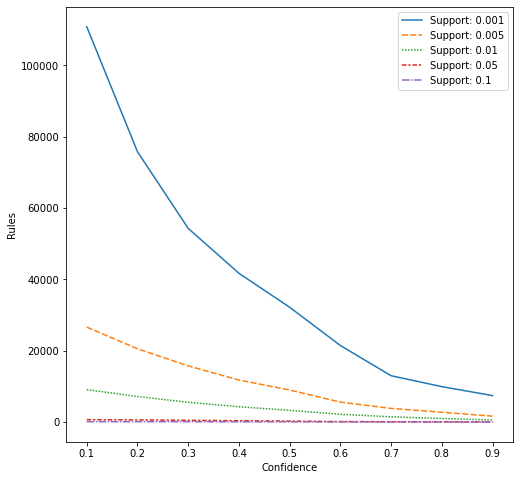

In [8]:
#visualizing the number of rules for different values of support and confidence
plt.figure(figsize=(8,8))
sns.lineplot(data=all_conf1)
plt.ylabel('Rules')
plt.xlabel('Confidence')

### Conclusion:

As seen in the plot, the number of rules decreases as the value of support and confidence increases

## Creating the association rule for a specific value of support and confidence

Lets try with Support 0.01 and Confidence at 0.9

In [9]:
freq_items_final1 =  apriori(df1, min_support=0.01, use_colnames=True)
freq_items_final1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
589,0.0125,"(ItalArt, ItalAtlas, RefBks, CookBks, ArtBks, ..."
590,0.0145,"(YouthBks, RefBks, GeogBks, DoItYBks, CookBks,..."
591,0.0105,"(ItalArt, GeogBks, DoItYBks, CookBks, ChildBks..."
592,0.0100,"(ItalArt, RefBks, GeogBks, CookBks, ChildBks, ..."


In [10]:
rules_final1 = association_rules(freq_items_final1,min_threshold=0.9,support_only=False)
rules_final1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(ChildBks, ItalCook)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
4,"(ChildBks, ItalAtlas)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
558,"(ItalAtlas, RefBks, ChildBks, ArtBks, ItalCook)","(ItalArt, CookBks)",0.0115,0.0410,0.0110,0.956522,23.329799,0.010528,22.0570
559,"(ItalAtlas, CookBks, ChildBks, ArtBks, ItalCook)","(ItalArt, RefBks)",0.0115,0.0200,0.0110,0.956522,47.826087,0.010770,22.5400
560,"(ItalArt, ItalAtlas, ChildBks, CookBks)","(ArtBks, RefBks, ItalCook)",0.0115,0.0235,0.0110,0.956522,40.703053,0.010730,22.4595
561,"(ItalArt, ItalAtlas, ItalCook, ChildBks)","(ArtBks, RefBks, CookBks)",0.0110,0.0700,0.0110,1.000000,14.285714,0.010230,inf


In [11]:
# top 20 assosiations as per the specified value of support and confidence
rules_final1.sort_values("lift", ascending=True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
371,"(RefBks, GeogBks, DoItYBks, YouthBks, ChildBks)",(CookBks),0.0300,0.431,0.0270,0.900000,2.088167,0.014070,5.690000
71,"(ItalArt, DoItYBks, YouthBks)",(CookBks),0.0150,0.431,0.0135,0.900000,2.088167,0.007035,5.690000
274,"(ItalArt, ArtBks, DoItYBks, YouthBks)",(CookBks),0.0150,0.431,0.0135,0.900000,2.088167,0.007035,5.690000
10,"(ItalArt, DoItYBks)",(CookBks),0.0300,0.431,0.0270,0.900000,2.088167,0.014070,5.690000
90,"(ItalArt, ArtBks, DoItYBks)",(CookBks),0.0300,0.431,0.0270,0.900000,2.088167,0.014070,5.690000
153,"(GeogBks, ChildBks, DoItYBks, YouthBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
531,"(RefBks, GeogBks, DoItYBks, YouthBks, ChildBks...",(CookBks),0.0160,0.431,0.0145,0.906250,2.102668,0.007604,6.069333
42,"(ChildBks, ItalArt, DoItYBks)",(CookBks),0.0220,0.431,0.0200,0.909091,2.109260,0.010518,6.259000
165,"(GeogBks, ItalArt, ChildBks, YouthBks)",(CookBks),0.0110,0.431,0.0100,0.909091,2.109260,0.005259,6.259000
395,"(ItalArt, GeogBks, YouthBks, ChildBks, ArtBks)",(CookBks),0.0110,0.431,0.0100,0.909091,2.109260,0.005259,6.259000


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

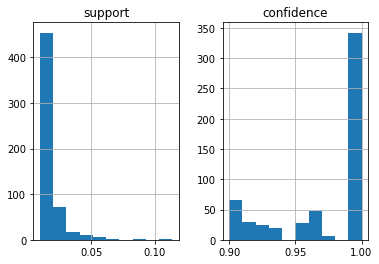

In [12]:
rules_final1[["support","confidence"]].hist()

# Data - my_movies

In [25]:
#importing the dataset
df = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-9-Association\my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [26]:
df2 = df.iloc[:,5:]
df2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [27]:
#basic information about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


The data contains 10 entries containing 10 different movies. There are no null values in the dataset

In [30]:
#defining different values of support and confidence
support2 = [0.001,0.005,0.01,0.05,0.1]
confidence2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [31]:
# finding the number of rules for the different values of support and confidence
confs2 = []
for i in support2:
    ap_i2 = rules(df2,confidence=confidence2,support=i)
    confs2.append(ap_i2)

In [32]:
all_conf2 = pd.concat(confs2,axis=1)
all_conf2

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,250,250,250,250,250
0.2,220,220,220,220,220
0.3,217,217,217,217,217
0.4,216,216,216,216,216
0.5,216,216,216,216,216
0.6,134,134,134,134,134
0.7,129,129,129,129,129
0.8,128,128,128,128,128
0.9,125,125,125,125,125


Text(0.5, 0, 'Confidence')

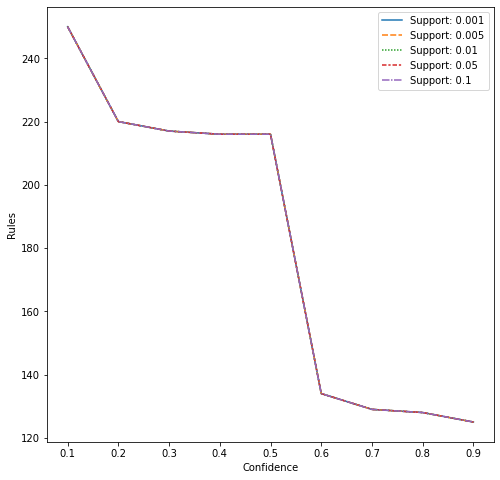

In [33]:
#visualizing the number of rules for different values of support and confidence
plt.figure(figsize=(8,8))
sns.lineplot(data=all_conf2)
plt.ylabel('Rules')
plt.xlabel('Confidence')

### Conclusion:

As seen in the plot, the number of rules decreases as the value of confidence increases and it remains same with all the values of support.

## Creating the association rule for a specific value of support and confidence

Lets try with Support 0.01 and Confidence at 0.9

In [22]:
freq_items_final2 =  apriori(df2, min_support=0.01, use_colnames=True)
freq_items_final2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [34]:
rules_final2 = association_rules(freq_items_final2,min_threshold=0.9,support_only=False)
rules_final2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Green Mile, Harry Potter1)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(LOTR2, Sixth Sense)","(LOTR1, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [35]:
rules_final2.sort_values("lift", ascending=True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,"(Green Mile, LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
33,"(Patriot, Braveheart)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
12,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf
37,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
27,"(Green Mile, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
29,"(Green Mile, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

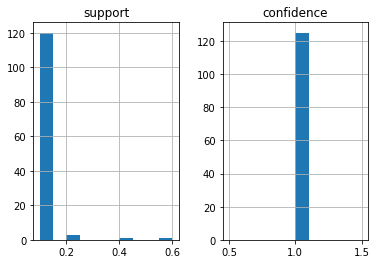

In [36]:
# top 20 assosiations as per the specified value of support and confidence
rules_final2[["support","confidence"]].hist()